<a href="https://colab.research.google.com/github/FelipeTavares7/data_science_projects/blob/main/Projeto_Previs%C3%A3o_de_usu%C3%A1rios_com_alta_chance_de_deixar_o_Streaming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business Understanding

**Projeto: Previsão de usuários
com alta chance de deixar o
Streaming**

**Contexto do Problema**:
> Uma plataforma de streaming está enfrentando um alto índice de cancelamento de assinaturas. A empresa acredita que é possível prever se um usuário tem mais chance de deixar a plataforma e tomar medidas para reduzir o churn.

**Objetivo do Projeto**:
> Criar um modelo de classificação capaz de prever se um usuário tem mais chance de cancelar a assinatura na plataforma.

**Descrição dos Dados:**
> Os dados dos clientes estão disponíveis em um arquivo CSV fornecido pela empresa, contendo informações sobre as contas dos clientes.

**Perguntas de Negócio:**
> * Quais usuários têm mais chance de cancelar a assinatura?
* Quais ações podem ser tomadas para reduzir o churn?

**Benefícios Esperados:**
>* Antecipação do cancelamento da assinatura e adoção de medidas para retenção de clientes.
* Redução do churn e aumento da satisfação dos clientes.

**Considerações:**
> É importante explorar diferentes variáveis e técnicas de modelagem para obter o melhor desempenho do modelo de previsão de churn.

**Metodologia:**
> Utilizar Python para desenvolver um modelo de classificação com base nos dados dos clientes e avaliar sua eficácia com métricas de desempenho adequadas.


---



In [ ]:
# Importando as Bibliotecas
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Data Understanding

In [ ]:
# Carregando os Dados
df = pd.read_csv('/content/streaming_data.csv', encoding='ISO-8859-1', delimiter=',')

## Analises Descritivas

In [ ]:
# Visualizando o Dataframe (5 primeiras linhas e as 5 últimas)
display(df)

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49.0,Male,4700.0,3.0,Basic,NaN,3,NaN,0.0,a271aa56-bcfc-4f0a-91f7-b773de6b86a4
1,69.0,Female,6107.0,2.0,Standard,NaN,1,2.14,0.0,fe14b048-770b-4619-8ec6-485b0969ae31
2,44.0,Male,6374.0,3.0,Premium,1.0,1,1.91,1.0,0283dffd-6684-4a05-9c6f-c02098a6849d
3,26.0,Male,NaN,5.0,Basic,NaN,2,NaN,NaN,c316f2f5-3403-4a0a-82c2-c98e4b3379d2
4,18.0,NaN,1948.0,3.0,Basic,NaN,3,3.88,0.0,14879bcb-1977-4ad8-a7f9-6aa9bf7b872f
...,...,...,...,...,...,...,...,...,...,...
77879,45.0,Male,NaN,NaN,Basic,NaN,5,2.20,0.0,6b51fe0d-d4a1-41ed-a55c-d05f5c961e3c
77880,47.0,Female,6176.0,NaN,Premium,NaN,2,4.54,0.0,59d70167-6be0-474c-b71e-14153205b44f
77881,64.0,Female,NaN,5.0,Premium,NaN,1,4.34,1.0,a7d5ed26-78a4-4e70-bd04-0fec883e56aa
77882,58.0,Male,1314.0,5.0,Standard,NaN,4,NaN,0.0,472e9e70-87ca-4c5e-bfee-fa9f42b54f51


- O Dataframe possui 77884 linhas e 10 colunas. Sendo as colunas:
  - `Age` - Idade do cliente;
  - `Gender` - Gênero do cliente;
  - `Time_on_platform` - Dias de assinatura ativa do cliente;
  - `Devices_connected` - Quantidade de dispositivos conectados à conta;
  - `Subscription_type` - Tipo de conta;
  - `Num_streaming_services` - Quantidade de serviços de streaming que o
cliente possui;
  - `Num_active_profiles` - Número de perfis ativos na plataforma;
  - `Avg_rating` - Avaliação média dos conteúdos da plataforma;
  - `Churned` - Se o cliente cancelou a conta ou não (***Target***);
  - `User_id` - Código de identificação do cliente.


---



In [ ]:
# Informações sobre o DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77884 entries, 0 to 77883
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     66607 non-null  float64
 1   Gender                  63368 non-null  object 
 2   Time_on_platform        56464 non-null  float64
 3   Devices_connected       52696 non-null  float64
 4   Subscription_type       52663 non-null  object 
 5   Num_streaming_services  9572 non-null   float64
 6   Num_active_profiles     77884 non-null  int64  
 7   Avg_rating              60614 non-null  float64
 8   Churned                 61148 non-null  float64
 9   User_id                 77884 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 5.9+ MB


In [ ]:
# Verificando a quantidade de valores nulos em cada coluna
df.isnull().sum()

Age                       11277
Gender                    14516
Time_on_platform          21420
Devices_connected         25188
Subscription_type         25221
Num_streaming_services    68312
Num_active_profiles           0
Avg_rating                17270
Churned                   16736
User_id                       0
dtype: int64

- Somente em `Num_active_profiles` e `User_id` não há dados nulos;
- `Age`, `Time_on_platform`, `Devices_connected`, `Num_streaming_services`, `Avg_rating` e `Churned` deveriam ser 'int', mas estão como 'float'.


---


# Data Preparation

## Excluindo `User_id` por não fazer sentido nas análises

In [ ]:
df = df.drop('User_id', axis=1)



---



## Tratando Dados Nulos

Substituindo valores “NaN” por 0 nas colunas: `Time_on_platform`,
`Num_streaming_services`, `Churned`, `Avg_rating` e `Devices_connected`.

In [ ]:
colunas_NaN = ['Time_on_platform', 'Num_streaming_services', 'Churned', 'Avg_rating', 'Devices_connected']
df[colunas_NaN] = df[colunas_NaN].fillna(0)

Dropando linhas nulas nas colunas `Gender`, `Subscription_type` e `Age`.

In [ ]:
df.dropna(subset=['Gender', 'Subscription_type', 'Age'], inplace=True)



---



## Transformando valores `Churned`

Transformando valores `Churned` de 0 e 1 por 'No' e 'Yes', respectivamente.

In [ ]:
df['Churned'] = df['Churned'].replace({0: 'No', 1: 'Yes'})



---



## Corrigindo Tipos de Dados das colunas

In [ ]:
# Verificando Tipos dos dados de cada coluna
df.dtypes

Age                       float64
Gender                     object
Time_on_platform          float64
Devices_connected         float64
Subscription_type          object
Num_streaming_services    float64
Num_active_profiles         int64
Avg_rating                float64
Churned                    object
dtype: object

  Tipo esperado de cada coluna:
  - `Age` - int ❌
  - `Gender` - object / str ✅
  - `Time_on_platform` - int ❌
  - `Devices_connected` - int ❌
  - `Subscription_type` - object / str ✅
  - `Num_streaming_services` - int ❌
  - `Num_active_profiles` - int ✅
  - `Avg_rating` - int ❌
  - `Churned` - int ❌

In [ ]:
# Transformando as colunas float para int
for coluna in df.columns:
    if df[coluna].dtype == 'float64':
        df[coluna] = df[coluna].astype(int)

In [ ]:
# Verificando Tipos dos dados de cada coluna após conversões
df.dtypes

Age                        int64
Gender                    object
Time_on_platform           int64
Devices_connected          int64
Subscription_type         object
Num_streaming_services     int64
Num_active_profiles        int64
Avg_rating                 int64
Churned                   object
dtype: object

 Tipo esperado de cada coluna:
  - `Age` - int ✅
  - `Gender` - object / str ✅
  - `Time_on_platform` - int ✅
  - `Devices_connected` - int ✅
  - `Subscription_type` - object / str ✅
  - `Num_streaming_services` - int ✅
  - `Num_active_profiles` - int ✅
  - `Avg_rating` - int ✅
  - `Churned` - int ✅


---



## Aplicando *One-Hot Encoding* nas variáveis categóricas para o Modeling.

In [ ]:
df_ohe = pd.get_dummies(df, columns=['Gender', 'Subscription_type'])

In [ ]:
# Verificando o encoding
df_ohe.head()

,Age,Time_on_platform,Devices_connected,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,Gender_Female,Gender_Male,Subscription_type_Basic,Subscription_type_Premium,Subscription_type_Standard
0,49,4700,3,0,3,0,No,0,1,1,0,0
1,69,6107,2,0,1,2,No,1,0,0,0,1
2,44,6374,3,1,1,1,Yes,0,1,0,1,0
3,26,0,5,0,2,0,No,0,1,1,0,0
5,54,3024,2,0,1,0,No,0,1,1,0,0




---



# Modeling

In [ ]:
# Definindo variáveis X e y
X = df_ohe.drop('Churned', axis=1)
y = df_ohe['Churned']

In [ ]:
# Normalizando o dados
mms = MinMaxScaler()
X = pd.DataFrame(mms.fit_transform(X))
X.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.607843,0.536591,0.6,0.00,0.50,0.0,0.0,1.0,1.0,0.0,0.0
1,1.000000,0.697226,0.4,0.00,0.00,0.4,1.0,0.0,0.0,0.0,1.0
2,0.509804,0.727709,0.6,0.25,0.00,0.2,0.0,1.0,0.0,1.0,0.0
3,0.156863,0.000000,1.0,0.00,0.25,0.0,0.0,1.0,1.0,0.0,0.0
4,0.705882,0.345245,0.4,0.00,0.00,0.0,0.0,1.0,1.0,0.0,0.0


In [ ]:
# Separando em train e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)



---



## Logistic Regression

In [ ]:
# Criando o modelo de Logistic Regression
lr = LogisticRegression()

In [ ]:
# Treinando
lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Fazendo previsões
y_pred_lr = lr.predict(X_test)

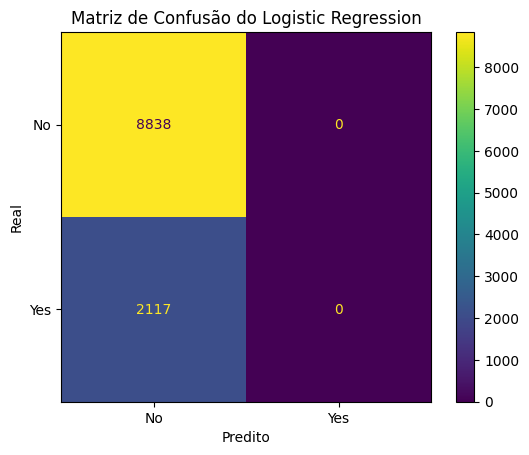

In [ ]:
# Plotando matriz de confusão do Logistic Regression
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr)
plt.title('Matriz de Confusão do Logistic Regression')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()

In [ ]:
# Acurácia Logistic Regression
print(f"Acurácia (Treino): {accuracy_score(y_train, lr.predict(X_train))}")
print(f"Acurácia (Teste): {accuracy_score(y_test, lr.predict(X_test))}")
print('-' * 60)

Acurácia (Treino): 0.8067683881064163
Acurácia (Teste): 0.8067549064354176
------------------------------------------------------------


### Tunning do Logistic Regression

In [ ]:
# Definindo os parâmetros para testar
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
}

In [ ]:
# Criando o GridSearchCV
grid_search_lr = GridSearchCV(lr, param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1)

In [ ]:
# Treinando o modelo usando GridSearchCV
grid_search_lr.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l2']},
             scoring='accuracy')

In [ ]:
# Criando uma tabela com os resultados do Grid Search
results_lr = pd.DataFrame(grid_search_lr.cv_results_)

# Rankeando os resultados
results_lr.sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.282273,0.030854,0.062355,0.014120,0.001,l2,"{'C': 0.001, 'penalty': 'l2'}",0.806729,0.806729,0.806729,0.806729,0.806925,0.806768,0.000078,1
1,0.244610,0.073703,0.032909,0.009830,0.01,l2,"{'C': 0.01, 'penalty': 'l2'}",0.806729,0.806729,0.806729,0.806729,0.806925,0.806768,0.000078,1
2,0.270901,0.044818,0.034135,0.013316,0.1,l2,"{'C': 0.1, 'penalty': 'l2'}",0.806729,0.806729,0.806729,0.806729,0.806925,0.806768,0.000078,1
3,0.246647,0.058305,0.039578,0.009412,1,l2,"{'C': 1, 'penalty': 'l2'}",0.806729,0.806729,0.806729,0.806729,0.806925,0.806768,0.000078,1
4,0.135777,0.030630,0.029005,0.007245,10,l2,"{'C': 10, 'penalty': 'l2'}",0.806729,0.806729,0.806729,0.806729,0.806925,0.806768,0.000078,1


In [ ]:
# Parâmetros do melhor estimador encontrado pelo Grid Search do Logistic Regression
best_params_lr = grid_search_lr.best_estimator_.get_params()
best_params_lr

{'C': 0.001,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

Logistic Regressor com os melhores parâmetros

In [ ]:
# Criando o modelo usando os melhores parâmetros
lr_t = LogisticRegression(**best_params_lr)

In [ ]:
# Treinando o modelo
lr_t.fit(X_train, y_train)

LogisticRegression(C=0.001)

In [ ]:
# Fazendo previsões
y_pred_lr_t = lr_t.predict(X_test)

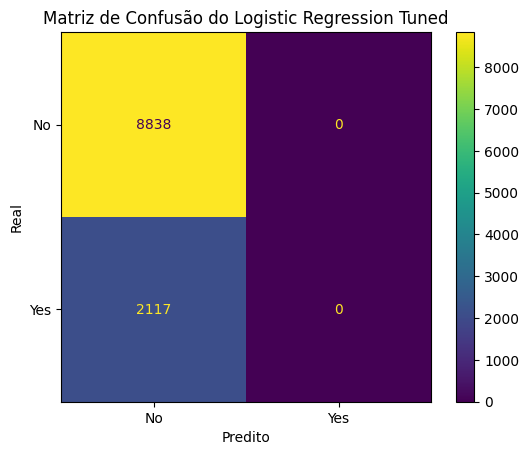

In [ ]:
# Plotando matriz de confusão do Logistic Regression Tuned
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr_t)
plt.title('Matriz de Confusão do Logistic Regression Tuned')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()

In [ ]:
# Acurácia do Logistic Regression Tuned
print(f"Acurácia (Treino): {accuracy_score(y_train, lr_t.predict(X_train))}")
print(f"Acurácia (Teste): {accuracy_score(y_test, lr_t.predict(X_test))}")
print('-' * 60)

Acurácia (Treino): 0.8067683881064163
Acurácia (Teste): 0.8067549064354176
------------------------------------------------------------




---



## Random Forest

In [ ]:
# Criando o modelo de Random Forest
rf = RandomForestClassifier()

In [ ]:
# Treinando
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# Fazendo previsões
y_pred_rf = rf.predict(X_test)

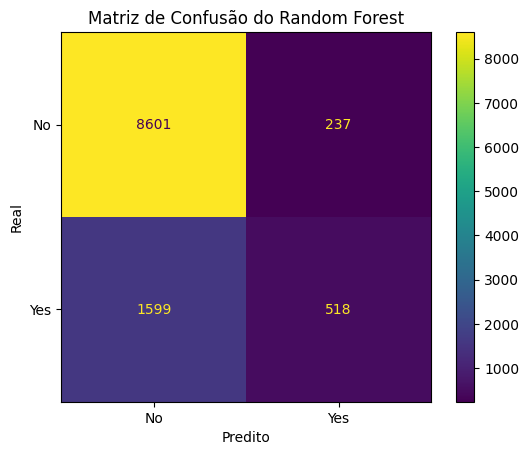

In [ ]:
# Plotando matriz de confusão do Random Forest
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf)
plt.title('Matriz de Confusão do Random Forest')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()

In [ ]:
# Acurácia do Random Forest
print(f"Acurácia (Treino): {accuracy_score(y_train, rf.predict(X_train))}")
print(f"Acurácia (Teste): {accuracy_score(y_test, rf.predict(X_test))}")
print('-' * 60)

Acurácia (Treino): 0.9948356807511737
Acurácia (Teste): 0.8324052943861251
------------------------------------------------------------


### Tunning do Random Forest

In [ ]:
# Definindo os parâmetros para testar
param_grid_rf = {
    'max_depth': [1, 2, 3, 4, 5],
    'n_estimators': [100, 300]
}

In [ ]:
# Criando o GridSearchCV
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)

In [ ]:
# Treinando o modelo usando GridSearchCV
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'n_estimators': [100, 300]},
             scoring='accuracy')

In [ ]:
# Criando uma tabela com os resultados do Grid Search
results_rf = pd.DataFrame(grid_search_rf.cv_results_)

# Rankeando os resultados
results_rf.sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.538567,0.143001,0.090811,0.023473,1,100,"{'max_depth': 1, 'n_estimators': 100}",0.806729,0.806729,0.806729,0.806729,0.806925,0.806768,0.000078,1
1,4.438189,1.257145,0.228540,0.100243,1,300,"{'max_depth': 1, 'n_estimators': 300}",0.806729,0.806729,0.806729,0.806729,0.806925,0.806768,0.000078,1
2,0.966391,0.029357,0.077475,0.026061,2,100,"{'max_depth': 2, 'n_estimators': 100}",0.806729,0.806729,0.806729,0.806729,0.806925,0.806768,0.000078,1
3,3.310511,0.661724,0.159708,0.010630,2,300,"{'max_depth': 2, 'n_estimators': 300}",0.806729,0.806729,0.806729,0.806729,0.806925,0.806768,0.000078,1
4,1.127004,0.025027,0.071018,0.002490,3,100,"{'max_depth': 3, 'n_estimators': 100}",0.806729,0.806729,0.806729,0.806729,0.806925,0.806768,0.000078,1


In [ ]:
# Parâmetros do melhor estimador encontrado pelo Grid Search do Random Forest
best_params_rf = grid_search_rf.best_estimator_.get_params()
best_params_rf

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 1,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Randon Forest com os melhores parâmetros

In [ ]:
# Criando o modelo usando os melhores parâmetros
rf_t = RandomForestClassifier(**best_params_rf)

In [ ]:
# Treinando o modelo
rf_t.fit(X_train, y_train)

RandomForestClassifier(max_depth=1)

In [ ]:
# Fazendo previsões
y_pred_rf_t = rf_t.predict(X_test)

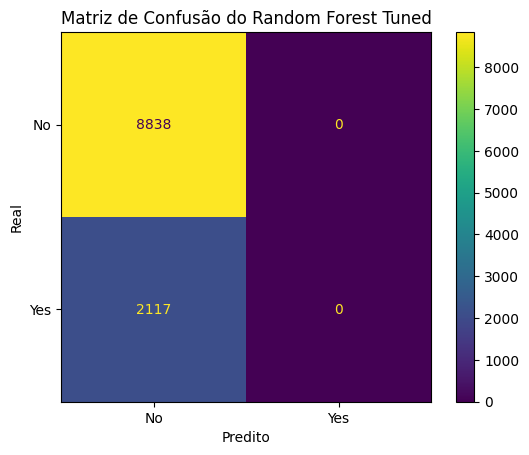

In [ ]:
# Plotando matriz de confusão do Random Forest Tuned
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf_t)
plt.title('Matriz de Confusão do Random Forest Tuned')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()

In [ ]:
# Acurácia do Random Forest Tuned
print(f"Acurácia (Treino): {accuracy_score(y_train, rf_t.predict(X_train))}")
print(f"Acurácia (Teste): {accuracy_score(y_test, rf_t.predict(X_test))}")
print('-' * 60)

Acurácia (Treino): 0.8067683881064163
Acurácia (Teste): 0.8067549064354176
------------------------------------------------------------




---

